In [1]:
import numpy as np
import pandas as pd

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)
plt.rcParams.update({'font.size': 22})# pour les polices de graphiques

In [2]:
# Lisez les données 

In [3]:
df = pd.read_csv("Aquifer.csv")
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [5]:
from datetime import datetime, date 
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...,...
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4


# Faites un graphique des donnees

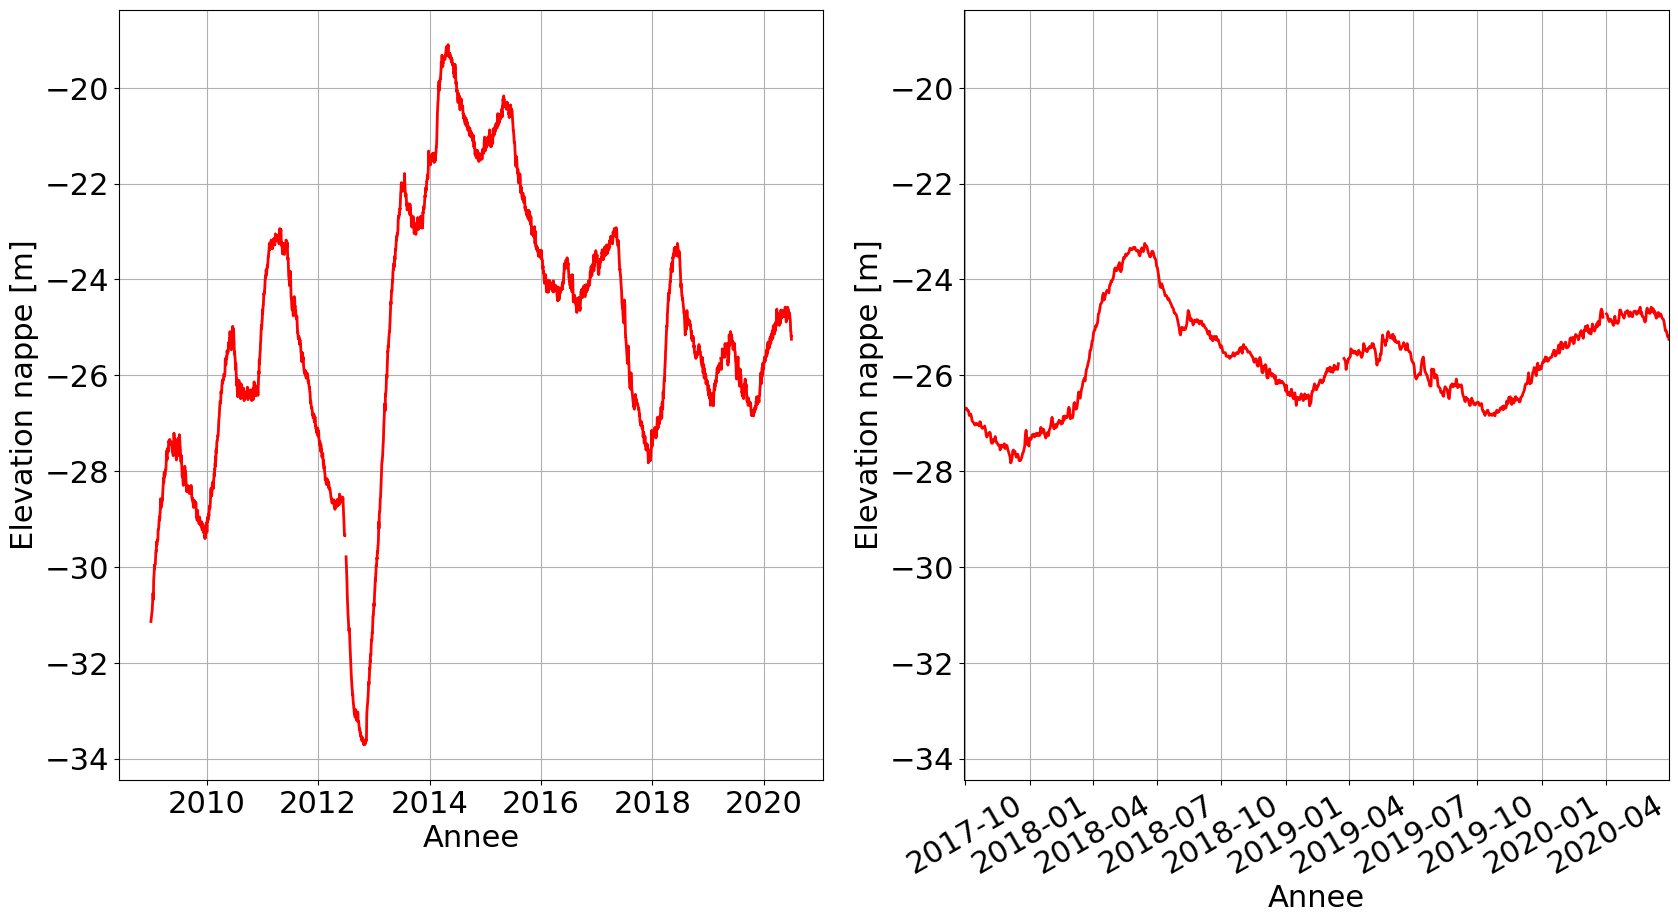

In [7]:
figi,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].plot(df.date,df.depth_to_groundwater,'r',linewidth=2)
ax[0].set_ylabel('Elevation nappe [m]')
ax[0].set_xlabel('Annee')
ax[0].grid()

ax[1].plot(df.date,df.depth_to_groundwater,'r',linewidth=2)
ax[1].set_ylabel('Elevation nappe [m]')
ax[1].set_xlabel('Annee')
ax[1].grid()
ax[1].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
props = {"rotation" : 30}
_=plt.setp(ax[1].get_xticklabels(), **props)

# On peut moyenner les données tres facilement avec une moyenne glissante

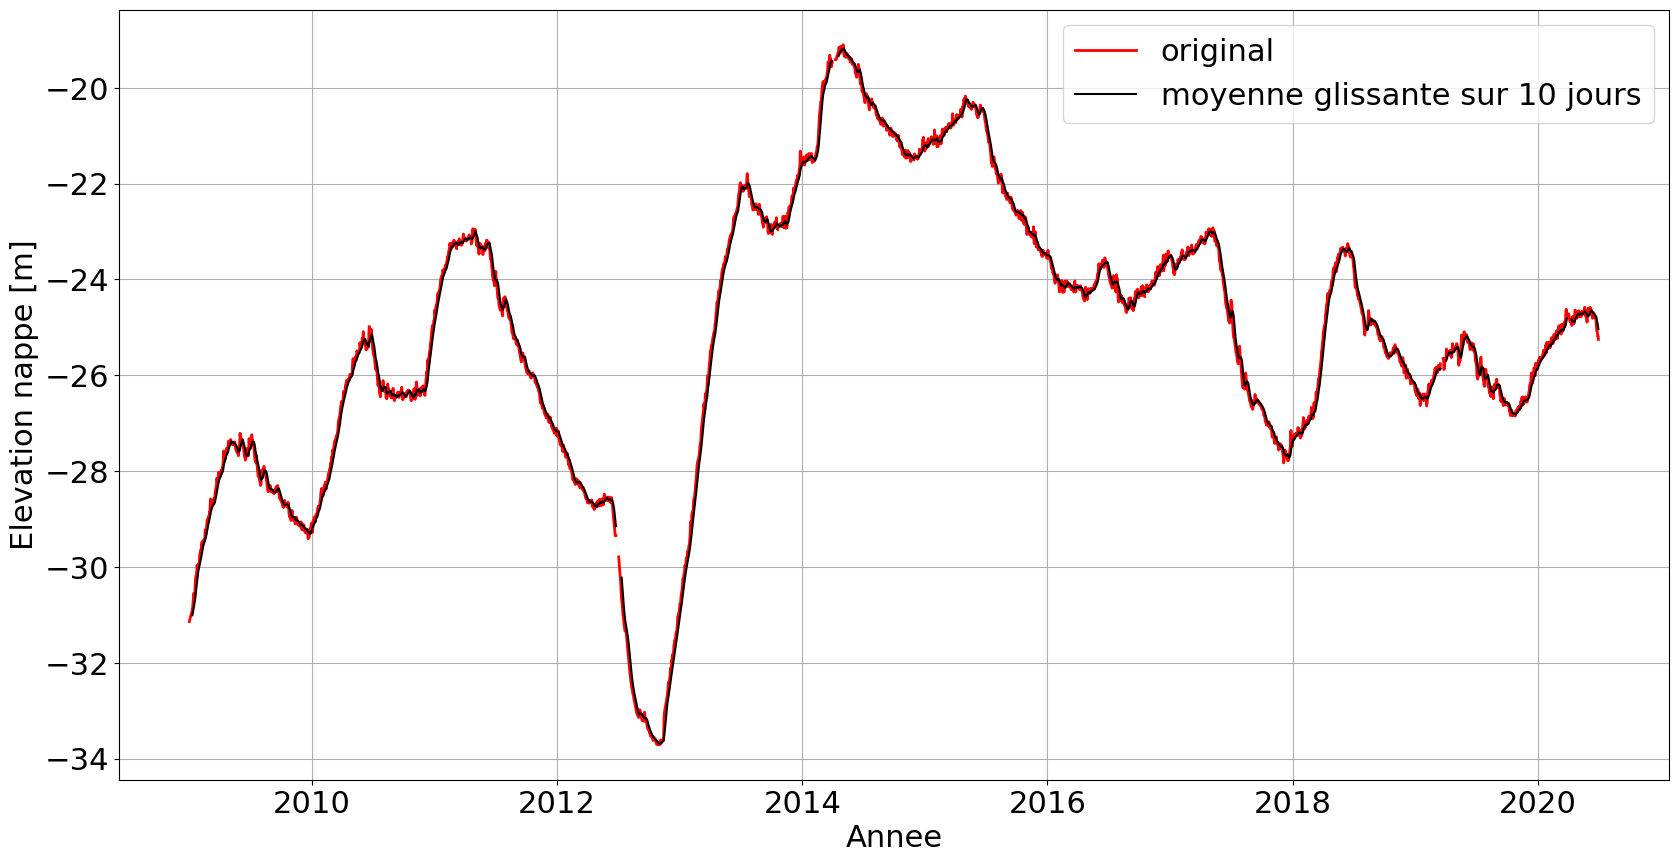

In [25]:
jjours=10
figi,ax=plt.subplots(1,1,figsize=(20,10))
ax.plot(df.date,df.depth_to_groundwater,'r',linewidth=2,label='original')
ax.plot(df.date,df.depth_to_groundwater.rolling(jjours).mean(),'k',label='moyenne glissante sur '+str(jjours)+' jours')
ax.set_ylabel('Elevation nappe [m]')
ax.set_xlabel('Annee')
ax.grid()
plt.legend()





#la moyenne glissante permet quoi?



## On peut aussi tout simplement réechantillonner

In [27]:
df_rs=df.resample('7D',on = 'date').median().reset_index(drop=False)

#on fait du reechantillonnage. Des donées journalieres transformées en données par semaine

In [29]:
df_rs

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01,0.0,-31.050,1.50,-28785.888,2.4
1,2009-01-08,0.0,-30.830,4.30,-29845.152,2.3
2,2009-01-15,0.0,-30.410,7.80,-23793.696,2.3
3,2009-01-22,0.0,-29.970,6.00,-23939.712,2.6
4,2009-01-29,0.0,-29.740,4.70,-25226.208,2.5
...,...,...,...,...,...,...
595,2020-05-28,0.0,-24.690,17.20,-25880.256,2.4
596,2020-06-04,2.0,-24.620,18.40,-24317.280,2.6
597,2020-06-11,1.6,-24.760,19.30,-27245.376,2.8
598,2020-06-18,0.0,-24.820,21.80,-27689.472,2.6


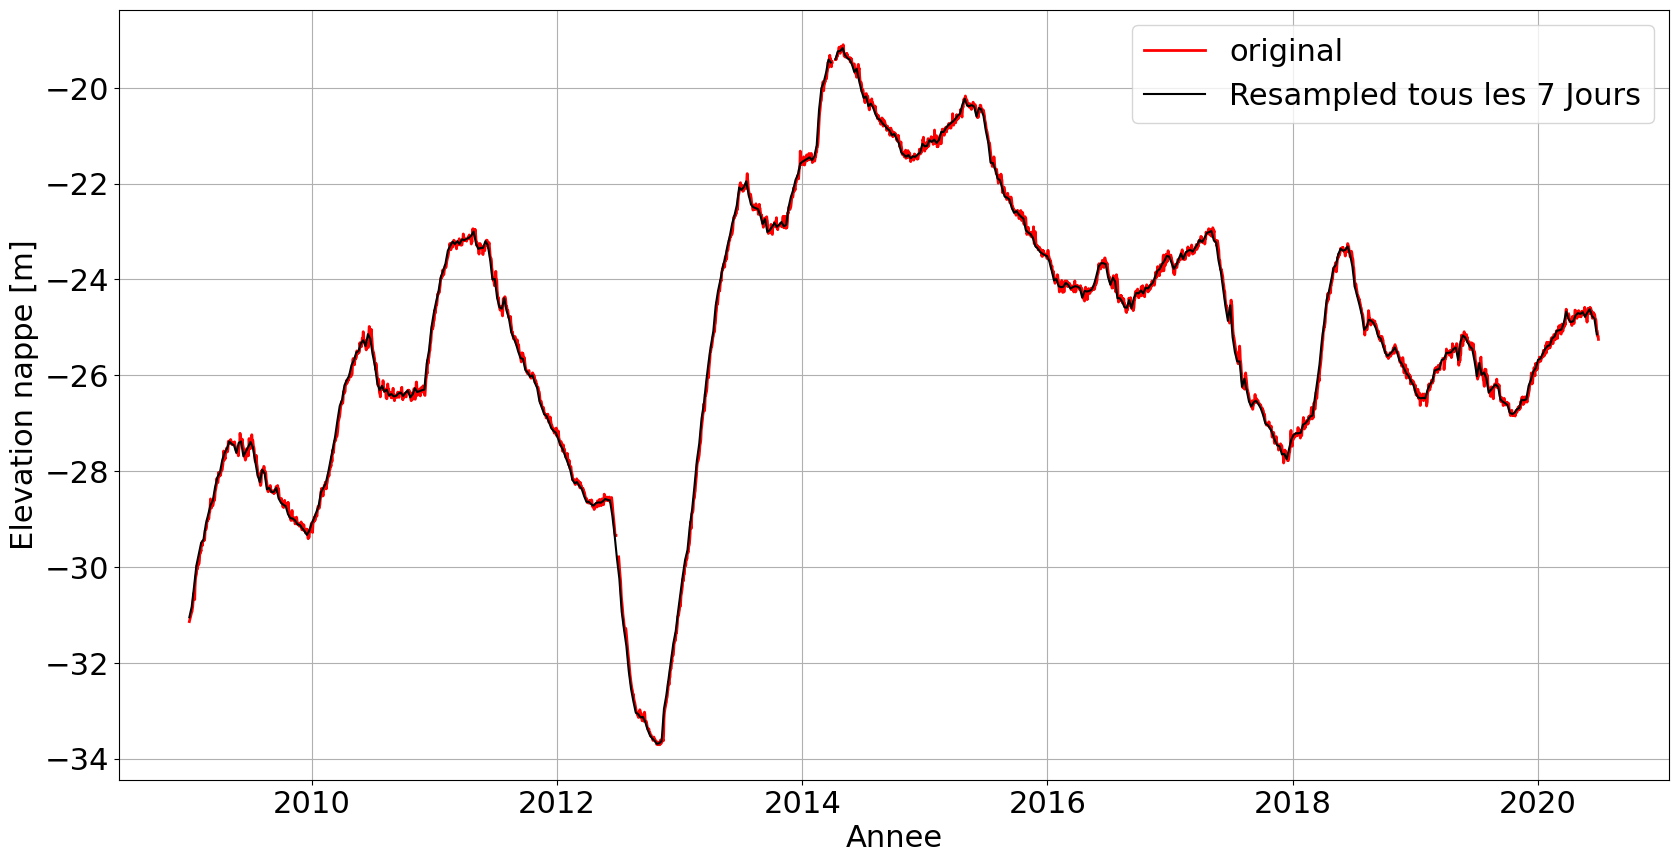

In [31]:
#graphiques des données reechantillonnées

figi,ax=plt.subplots(1,1,figsize=(20,10))
ax.plot(df.date,df.depth_to_groundwater,'r',linewidth=2,label='original')
ax.plot(df_rs.date,df_rs.depth_to_groundwater,'k',label='Resampled tous les 7 Jours')
ax.set_ylabel('Elevation nappe [m]')
ax.set_xlabel('Annee')
ax.grid()
plt.legend()



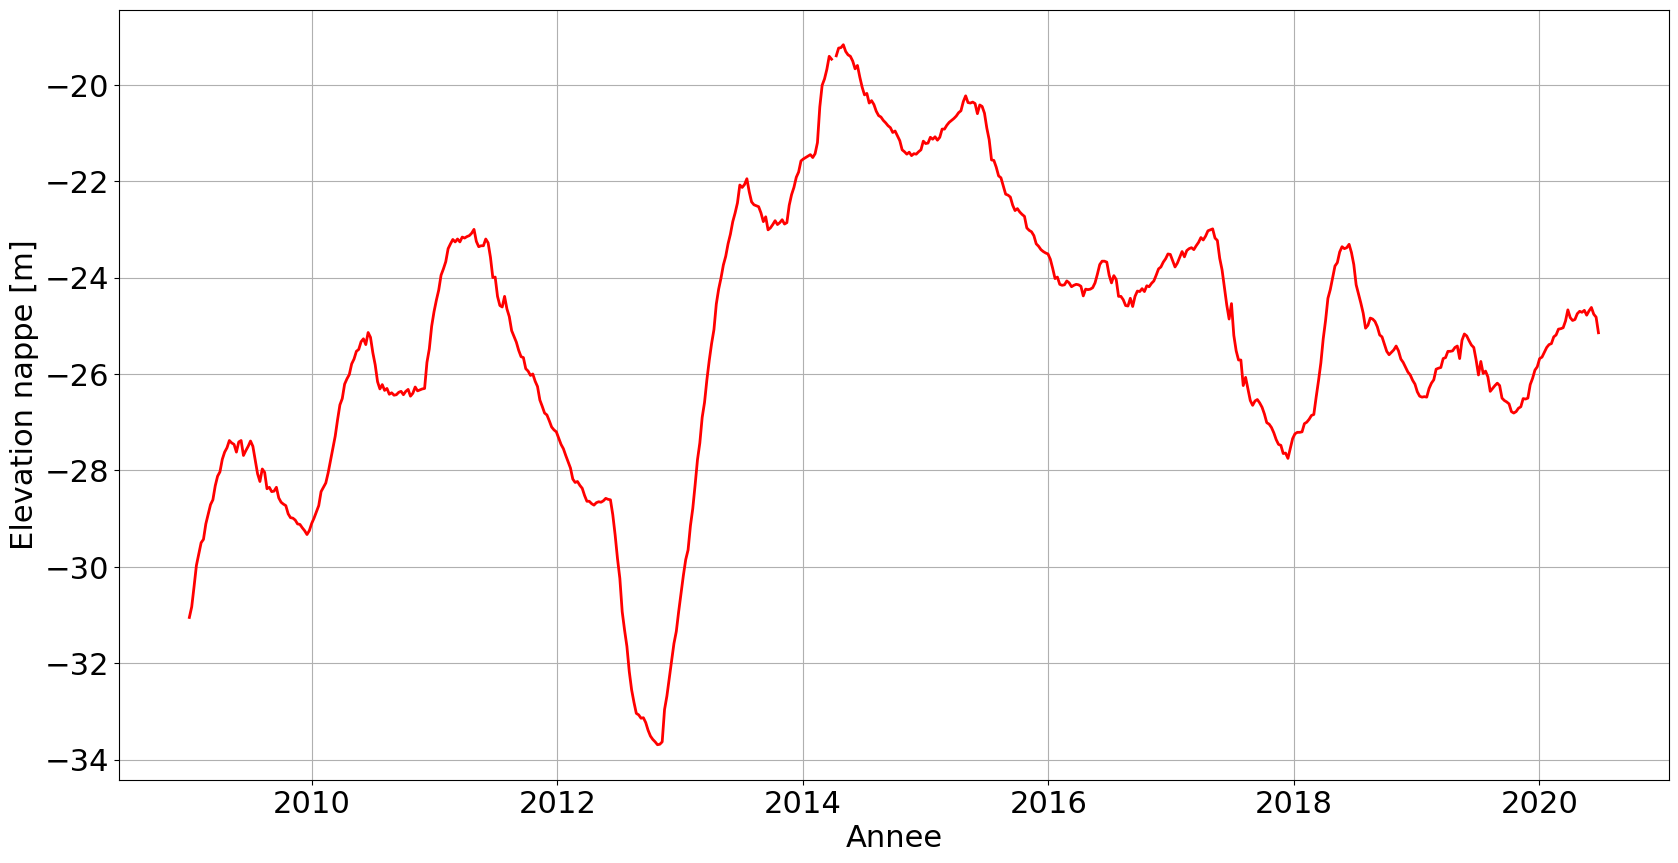

In [33]:
figi,ax=plt.subplots(1,1,figsize=(20,10))
ax.plot(df_rs.date,df_rs.depth_to_groundwater,'r',linewidth=2)
ax.set_ylabel('Elevation nappe [m]')
#ax[1].set_ylabel('Volume [m3]')
ax.set_xlabel('Annee')
#ax[1].set_xlabel('Annee')
ax.grid()
#ax[1].grid()

## vérifions le nombre de nan dans la dataframe



In [35]:
df.isna().sum()


date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
dtype: int64

## Enlevons les nan!
 Remplacer les données manquantes en utilisant : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html


In [37]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()


In [39]:
df=df.resample('7D',on = 'date').median().reset_index(drop=False)
df

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01,0.0,-31.050,1.50,-28785.888,2.4
1,2009-01-08,0.0,-30.830,4.30,-29845.152,2.3
2,2009-01-15,0.0,-30.410,7.80,-23793.696,2.3
3,2009-01-22,0.0,-29.970,6.00,-23939.712,2.6
4,2009-01-29,0.0,-29.740,4.70,-25226.208,2.5
...,...,...,...,...,...,...
595,2020-05-28,0.0,-24.690,17.20,-25880.256,2.4
596,2020-06-04,2.0,-24.620,18.40,-24317.280,2.6
597,2020-06-11,1.6,-24.760,19.30,-27093.744,2.8
598,2020-06-18,0.0,-24.820,21.80,-27689.472,2.6


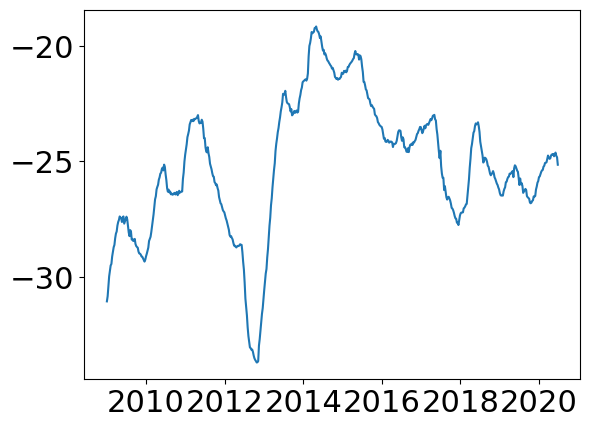

In [41]:
figi,ax=plt.subplots(1,1)
ax=plt.plot(df.date,df.depth_to_groundwater)

## Faites une seasonal décomposition sur le les données réechantillonnée à la semaine

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume', 
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 8))
ax[0].plot(df.date,df.rainfall_seasonal,'r',label='rainfall trend')
ax[0].plot(df.date,df.temperature_seasonal,'b',label='temperature trend')
ax[0].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
ax[1].plot(df.date,df.rainfall_seasonal,'r',label='drainage trend')
ax[1].plot(df.date,df.drainage_volume_seasonal,'b',label='river trend')
ax[1].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
ax[2].plot(df.date,df.depth_to_groundwater_seasonal,'r',label='aquifer trend')
ax[2].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])


In [ ]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

In [ ]:
df.head()

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'depth_to_groundwater_seasonal',         
    'temperature_seasonal_shift_b_2m',
    'drainage_volume_seasonal_shift_2m', 
    'river_hydrometry_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Lagged Features', fontsize=16)



In [ ]:
#prediction
from sklearn.model_selection import train_test_split


X = df['date']
y = df['depth_to_groundwater'].interpolate()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [ ]:
figi,ax=plt.subplots(1,1)
ax.plot(X_train,y_train,'b',linewidth=3)
ax.plot(X_test,y_test,'r',linewidth=3)
ax.grid()

# Prédiction

## Tout d'abord installation de la librairie

In [ ]:
!pip3 install prophet

## Import de la librairie

In [ ]:
from prophet import Prophet

## Creation de la taille de vecteur de test et de training

In [ ]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

## Selection des variables

In [ ]:
df['depth_to_groundwater']=df['depth_to_groundwater'].interpolate()
df['drainage_volume']=df['drainage_volume'].interpolate()
univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']




## decoupage en partie de test et de validation

In [ ]:
train=univariate_df.iloc[:train_size,:]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

## prédiction

In [ ]:
model = Prophet()
model.fit(train)
# x_valid = model.make_future_dataframe(periods=test_size, freq='w')
# Predict on valid set
y_pred = model.predict(x_valid)

## Comparaison

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(x_valid)
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = np.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

In [ ]:
f, ax = plt.subplots(1,1)
f.set_figheight(6)
f.set_figwidth(15)
model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

# Prediction en utilisant d'autres chroniques

In [ ]:
feature_columns = [
    'rainfall',
    'temperature',
    'drainage_volume',
    'river_hydrometry',
]
target_column = ['depth_to_groundwater']
train_size = int(0.85 * len(df))
multivariate_df = df[['date'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns
train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])
train.head()

In [ ]:
model = Prophet()
model.add_regressor('rainfall')
model.add_regressor('temperature')
model.add_regressor('drainage_volume')
model.add_regressor('river_hydrometry')
# Fit the model with train set
model.fit(train)
# Predict on valid set
y_pred = model.predict(x_valid)
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

In [ ]:
f, ax = plt.subplots(1,1)
f.set_figheight(6)
f.set_figwidth(15)
model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite